In [1]:
import pandas as pd
import numpy as np
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kuangsmacbook/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('tmdb_5000_movies.csv')
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
df['genres']

0       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1       [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3       [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
                              ...                        
4798    [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4799    [{"id": 35, "name": "Comedy"}, {"id": 10749, "...
4800    [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...
4801                                                   []
4802                  [{"id": 99, "name": "Documentary"}]
Name: genres, Length: 4803, dtype: object

In [4]:
df['overview'][5]

'The seemingly invincible Spider-Man goes up against an all-new crop of villain – including the shape-shifting Sandman. While Spider-Man’s superpowers are altered by an alien organism, his alter ego, Peter Parker, deals with nemesis Eddie Brock and also gets caught up in a love triangle.'

In [5]:
df.shape

(4803, 20)

# Multilabel Classification

In [6]:
map_genres = {}
for i in df['genres']:
    for j in json.loads(i):
        map_genres[j['id']] = j['name']
len(map_genres)

20

In [7]:
genres = []
for i in df['genres']:
    for j in json.loads(i):
        genres.append(j['id'])
print('before: ', len(genres))
genres = list(set(genres))
print('after: ', len(genres))

before:  12160
after:  20


In [8]:
df_new = df[['id','original_title', 'overview']]
df_new.head()

,id,original_title,overview
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [9]:
df_genres = pd.DataFrame(np.zeros((df_new.shape[0],len(genres))), columns=genres)
df_genres.head()

,10752,12,14,16,10769,18,10770,27,28,10402,35,36,37,9648,53,80,99,878,10749,10751
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df_genres.shape

(4803, 20)

In [11]:
df_new.shape

(4803, 3)

In [12]:
df_new = pd.concat([df_new, df_genres], axis=1)
df_new.head()

,id,original_title,overview,10752,12,14,16,10769,18,10770,...,35,36,37,9648,53,80,99,878,10749,10751
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,49529,John Carter,"John Carter is a war-weary, former military ca...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
len(df_new) == len(df)

True

In [14]:
for i in range(0,len(df)):
    if df['id'][i] == df_new['id'][i]:
        gen = json.loads(df['genres'][i])
        for j in gen:
            df_new[j['id']][i] += 1
df_new.head()

/var/folders/8p/swcwlbvs2mzgqz7mn8wc50lc0000gn/T/ipykernel_9266/85042519.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[j['id']][i] += 1


,id,original_title,overview,10752,12,14,16,10769,18,10770,...,35,36,37,9648,53,80,99,878,10749,10751
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,49529,John Carter,"John Carter is a war-weary, former military ca...",0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [15]:
df_new.dropna(axis=0, inplace=True)
df_new['overview'].isna().sum()

0

In [16]:
from sklearn.model_selection import train_test_split
X = df_new["overview"]
y = np.asarray(df_new[df_new.columns[3:]])

stop_words = stopwords.words('english')
  
# initializing TfidfVectorizer 
vetorizar = TfidfVectorizer(max_features=4000, max_df=0.85, stop_words=stop_words)
# fitting the tf-idf on the given data
vetorizar.fit(X)
  
# splitting the data to training and testing data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
  
# transforming the data
X_train_tfidf = vetorizar.transform(X_train)
X_test_tfidf = vetorizar.transform(X_test)

In [17]:
from skmultilearn.adapt import MLkNN
from sklearn.metrics import hamming_loss, accuracy_score

/Users/kuangsmacbook/miniforge3/envs/tf_m1/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_neighbors=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/kuangsmacbook/miniforge3/envs/tf_m1/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_neighbors=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/kuangsmacbook/miniforge3/envs/tf_m1/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_neighbors=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/kuangsmacbook/miniforge3/envs/tf_m1/lib

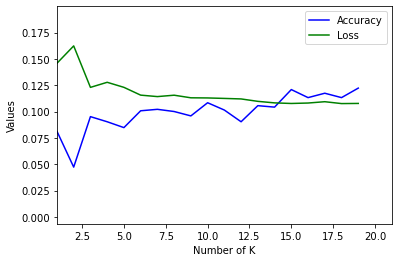

In [18]:
#Check K
import matplotlib.pyplot as plt

# using Multi-label kNN classifier
accuracy_list = []
loss_list = []
for k in range(1,21):
    mlknn_classifier = MLkNN(k=k)
    mlknn_classifier.fit(X_train_tfidf, y_train)
    predicted = mlknn_classifier.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, predicted)
    loss = hamming_loss(y_test, predicted)
    accuracy_list.append(accuracy)
    loss_list.append(loss)
    
plt.plot(accuracy_list, c='blue', label = 'Accuracy')
plt.plot(loss_list, c='green', label = 'Loss')
plt.xlim(1,21,1)
plt.xlabel('Number of K')
plt.ylabel('Values')
plt.legend()
plt.show()

In [29]:
mlknn_classifier = MLkNN(k=20)
mlknn_classifier.fit(X_train_tfidf, y_train)
predicted = mlknn_classifier.predict(X_test_tfidf)
  
print(accuracy_score(y_test, predicted))
print(hamming_loss(y_test, predicted))

/Users/kuangsmacbook/miniforge3/envs/tf_m1/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_neighbors=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


0.12222222222222222
0.10767361111111111


In [30]:
def predict_a_sent(sent):
    new_sentences = [sent]
    new_sentence_tfidf = vetorizar.transform(new_sentences)

    predicted_sentences = mlknn_classifier.predict(new_sentence_tfidf)
    predicted_genres = {}
    for i in range(0,len(genres)):
        if predicted_sentences.toarray()[0][i] == 1:
            predicted_genres[genres[i]] = map_genres[genres[i]]
    print(new_sentences,': ', predicted_genres)

In [31]:
predict_a_sent("Astronauts who have seen the Earth from space have often described the 'Overview Effect', an experience that has transformed their perspective of the planet and mankind's place upon it, and enabled them to perceive it as our shared home, without boundaries between nations or species. 'Overview' is a short film that explores this perspective through interviews with astronauts who have experienced the Overview Effect. The film also features insights from commentators and thinkers on the wider implications and importance of this understanding for humanity as a whole, and especially its relevance to how we meet the tremendous challenges facing our planet at this time.")

["Astronauts who have seen the Earth from space have often described the 'Overview Effect', an experience that has transformed their perspective of the planet and mankind's place upon it, and enabled them to perceive it as our shared home, without boundaries between nations or species. 'Overview' is a short film that explores this perspective through interviews with astronauts who have experienced the Overview Effect. The film also features insights from commentators and thinkers on the wider implications and importance of this understanding for humanity as a whole, and especially its relevance to how we meet the tremendous challenges facing our planet at this time."] :  {28: 'Action', 53: 'Thriller', 878: 'Science Fiction'}


In [32]:
predict_a_sent('After the devastating events of the Infinity War, the universe is in ruins. With the help of remaining allies, the Avengers assemble once more in order to reverse Thanos’ actions and restore balance to the universe.')

['After the devastating events of the Infinity War, the universe is in ruins. With the help of remaining allies, the Avengers assemble once more in order to reverse Thanos’ actions and restore balance to the universe.'] :  {35: 'Comedy', 878: 'Science Fiction'}


In [33]:
predict_a_sent("If you're looking for the perfect series to satisfy viewers of all ages, we've got a list of comedies, cartoons, and kooky construction shows to meet your needs. Class is in session with star and creator Quinta Brunson in her breakout sitcom, 'Abbott Elementary.' If that puts you in a learning mood, explore 'Our Great National Parks' with Barack Obama. Then head to 'Central Park' for an animated musical romp in NYC. For another animated option that kids and parents can relate to, check out 'The Proud Family: Louder and Prouder.' But if all you really want to see is expert builders constructing a taco-spitting dinosaur, then 'Making Fun' is the show for you.")

["If you're looking for the perfect series to satisfy viewers of all ages, we've got a list of comedies, cartoons, and kooky construction shows to meet your needs. Class is in session with star and creator Quinta Brunson in her breakout sitcom, 'Abbott Elementary.' If that puts you in a learning mood, explore 'Our Great National Parks' with Barack Obama. Then head to 'Central Park' for an animated musical romp in NYC. For another animated option that kids and parents can relate to, check out 'The Proud Family: Louder and Prouder.' But if all you really want to see is expert builders constructing a taco-spitting dinosaur, then 'Making Fun' is the show for you."] :  {35: 'Comedy'}


In [34]:
predict_a_sent("From visionary director Robert Eggers comes The Northman, an action-filled epic that follows a young Viking prince on his quest to avenge his father's murder.")

["From visionary director Robert Eggers comes The Northman, an action-filled epic that follows a young Viking prince on his quest to avenge his father's murder."] :  {28: 'Action'}


In [35]:
predict_a_sent("When the Riddler, a sadistic serial killer, begins murdering key political figures in Gotham, Batman is forced to investigate the city's hidden corruption and question his family's involvement.")

["When the Riddler, a sadistic serial killer, begins murdering key political figures in Gotham, Batman is forced to investigate the city's hidden corruption and question his family's involvement."] :  {28: 'Action', 53: 'Thriller', 80: 'Crime'}


In [36]:
predict_a_sent("Steven Grant discovers he's been granted the powers of an Egyptian moon god. But he soon finds out that these newfound powers can be both a blessing and a curse to his troubled life.")

["Steven Grant discovers he's been granted the powers of an Egyptian moon god. But he soon finds out that these newfound powers can be both a blessing and a curse to his troubled life."] :  {14: 'Fantasy', 878: 'Science Fiction'}


# Recommendation System

In [41]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

def genres_and_keywords_to_string(row):
    genres = json.loads(row['genres'])
    genres = ' '.join(''.join(j['name'].split()) for j in genres)

    keywords = json.loads(row['keywords'])
    keywords = ' '.join(''.join(j['name'].split()) for j in keywords)
    return "%s %s" % (genres, keywords)

In [42]:
df['string'] = df.apply(genres_and_keywords_to_string, axis=1)

In [43]:
# remove stopwords automatically
tfidf = TfidfVectorizer(max_features=2000)

# create a data matrix from the overviews
X = tfidf.fit_transform(df['string'])

# check the shape of X
print("X.shape:", X.shape)

X.shape: (4803, 2000)


In [44]:
# generate a mapping from movie title -> index (in df)
movie2idx = pd.Series(df.index, index=df['title'])
movie2idx

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [64]:
# create a function that generates recommendations
def recommend(title):
  # get the row in the dataframe for this movie
    idx = movie2idx[title]
    if type(idx) == pd.Series:
        idx = idx.iloc[0]
        print("idx:", idx)

  # calculate the pairwise similarities for this movie
    query = X[idx]
    scores = cosine_similarity(query, X)

      # currently the array is 1 x N, make it just a 1-D array
    scores = scores.flatten()

      # get the indexes of the highest scoring movies
      # get the first K recommendations
      # don't return itself!
    recommended_idx = (-scores).argsort()[1:6]

      # return the titles of the recommendations
    return df['title'].iloc[recommended_idx]

In [69]:
print("\nRecommendations for The Matrix:")
print(recommend('The Matrix'))

print("\nRecommendations for 'Mortal Kombat':")
print(recommend('Mortal Kombat'))

print("\nRecommendations for 'Runaway Bride':")
print(recommend('Runaway Bride'))


Recommendations for The Matrix:
125                    The Matrix Reloaded
123                 The Matrix Revolutions
2484                  The Thirteenth Floor
93      Terminator 3: Rise of the Machines
1725                          Blade Runner
Name: title, dtype: object

Recommendations for 'Mortal Kombat':
1611              Mortal Kombat: Annihilation
1670                       DOA: Dead or Alive
3856              In the Name of the King III
1001    Street Fighter: The Legend of Chun-Li
2237                        Alone in the Dark
Name: title, dtype: object

Recommendations for 'Runaway Bride':
4115                    House of D
2325    My Big Fat Greek Wedding 2
4604         It Happened One Night
3313                  An Education
2689            Our Family Wedding
Name: title, dtype: object
